In [1]:
# added. to access data
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git

%cd dlwpt-code/p1ch6

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 706, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 706 (delta 107), reused 89 (delta 87), pack-reused 554 (from 1)
Receiving objects: 100% (706/706), 175.17 MiB | 13.95 MiB/s, done.
Resolving deltas: 100% (319/319), done.
Updating files: 100% (228/228), done.
/content/dlwpt-code/p1ch6


In [2]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [4]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([1, 5, 4, 3, 9, 6, 2, 7, 0]), tensor([10,  8]))

In [5]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [6]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[3.3482],
        [2.3557]], grad_fn=<AddmmBackward0>)

In [7]:
linear_model.weight

Parameter containing:
tensor([[0.4963]], requires_grad=True)

In [8]:
linear_model.bias

Parameter containing:
tensor([-0.0464], requires_grad=True)

In [9]:
x = torch.ones(1)
linear_model(x)

tensor([0.4499], grad_fn=<ViewBackward0>)

In [10]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.4499],
        [0.4499],
        [0.4499],
        [0.4499],
        [0.4499],
        [0.4499],
        [0.4499],
        [0.4499],
        [0.4499],
        [0.4499]], grad_fn=<AddmmBackward0>)

In [11]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [12]:
linear_model.parameters()

<generator object Module.parameters at 0x7dfedf3a40b0>

In [13]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.3555]], requires_grad=True),
 Parameter containing:
 tensor([0.5736], requires_grad=True)]

In [14]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)

        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [15]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 86.9208, Validation loss 115.3715
Epoch 1000, Training loss 3.0798, Validation loss 7.5958
Epoch 2000, Training loss 2.4508, Validation loss 5.7279
Epoch 3000, Training loss 2.4377, Validation loss 5.4851

Parameter containing:
tensor([[5.2241]], requires_grad=True)
Parameter containing:
tensor([-16.4562], requires_grad=True)


In [16]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 186.0485, Validation loss 251.4810
Epoch 1000, Training loss 3.0960, Validation loss 7.6256
Epoch 2000, Training loss 2.4511, Validation loss 5.7315
Epoch 3000, Training loss 2.4377, Validation loss 5.4856

Parameter containing:
tensor([[5.2240]], requires_grad=True)
Parameter containing:
tensor([-16.4556], requires_grad=True)


In [17]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [18]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [19]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [20]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [21]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [22]:
seq_model.output_linear.bias

Parameter containing:
tensor([-0.2256], requires_grad=True)

In [23]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 177.5872, Validation loss 240.6623
Epoch 1000, Training loss 5.6903, Validation loss 6.0276
Epoch 2000, Training loss 3.6866, Validation loss 4.5203
Epoch 3000, Training loss 2.0831, Validation loss 1.9434
Epoch 4000, Training loss 1.9365, Validation loss 1.7898
Epoch 5000, Training loss 1.8996, Validation loss 1.8784
output tensor([[20.4485],
        [ 7.8582]], grad_fn=<AddmmBackward0>)
answer tensor([[21.],
        [ 6.]])
hidden tensor([[ 0.0003],
        [-0.0030],
        [ 0.0014],
        [ 0.0046],
        [ 0.0024],
        [-0.0103],
        [ 0.0030],
        [ 0.0031]])


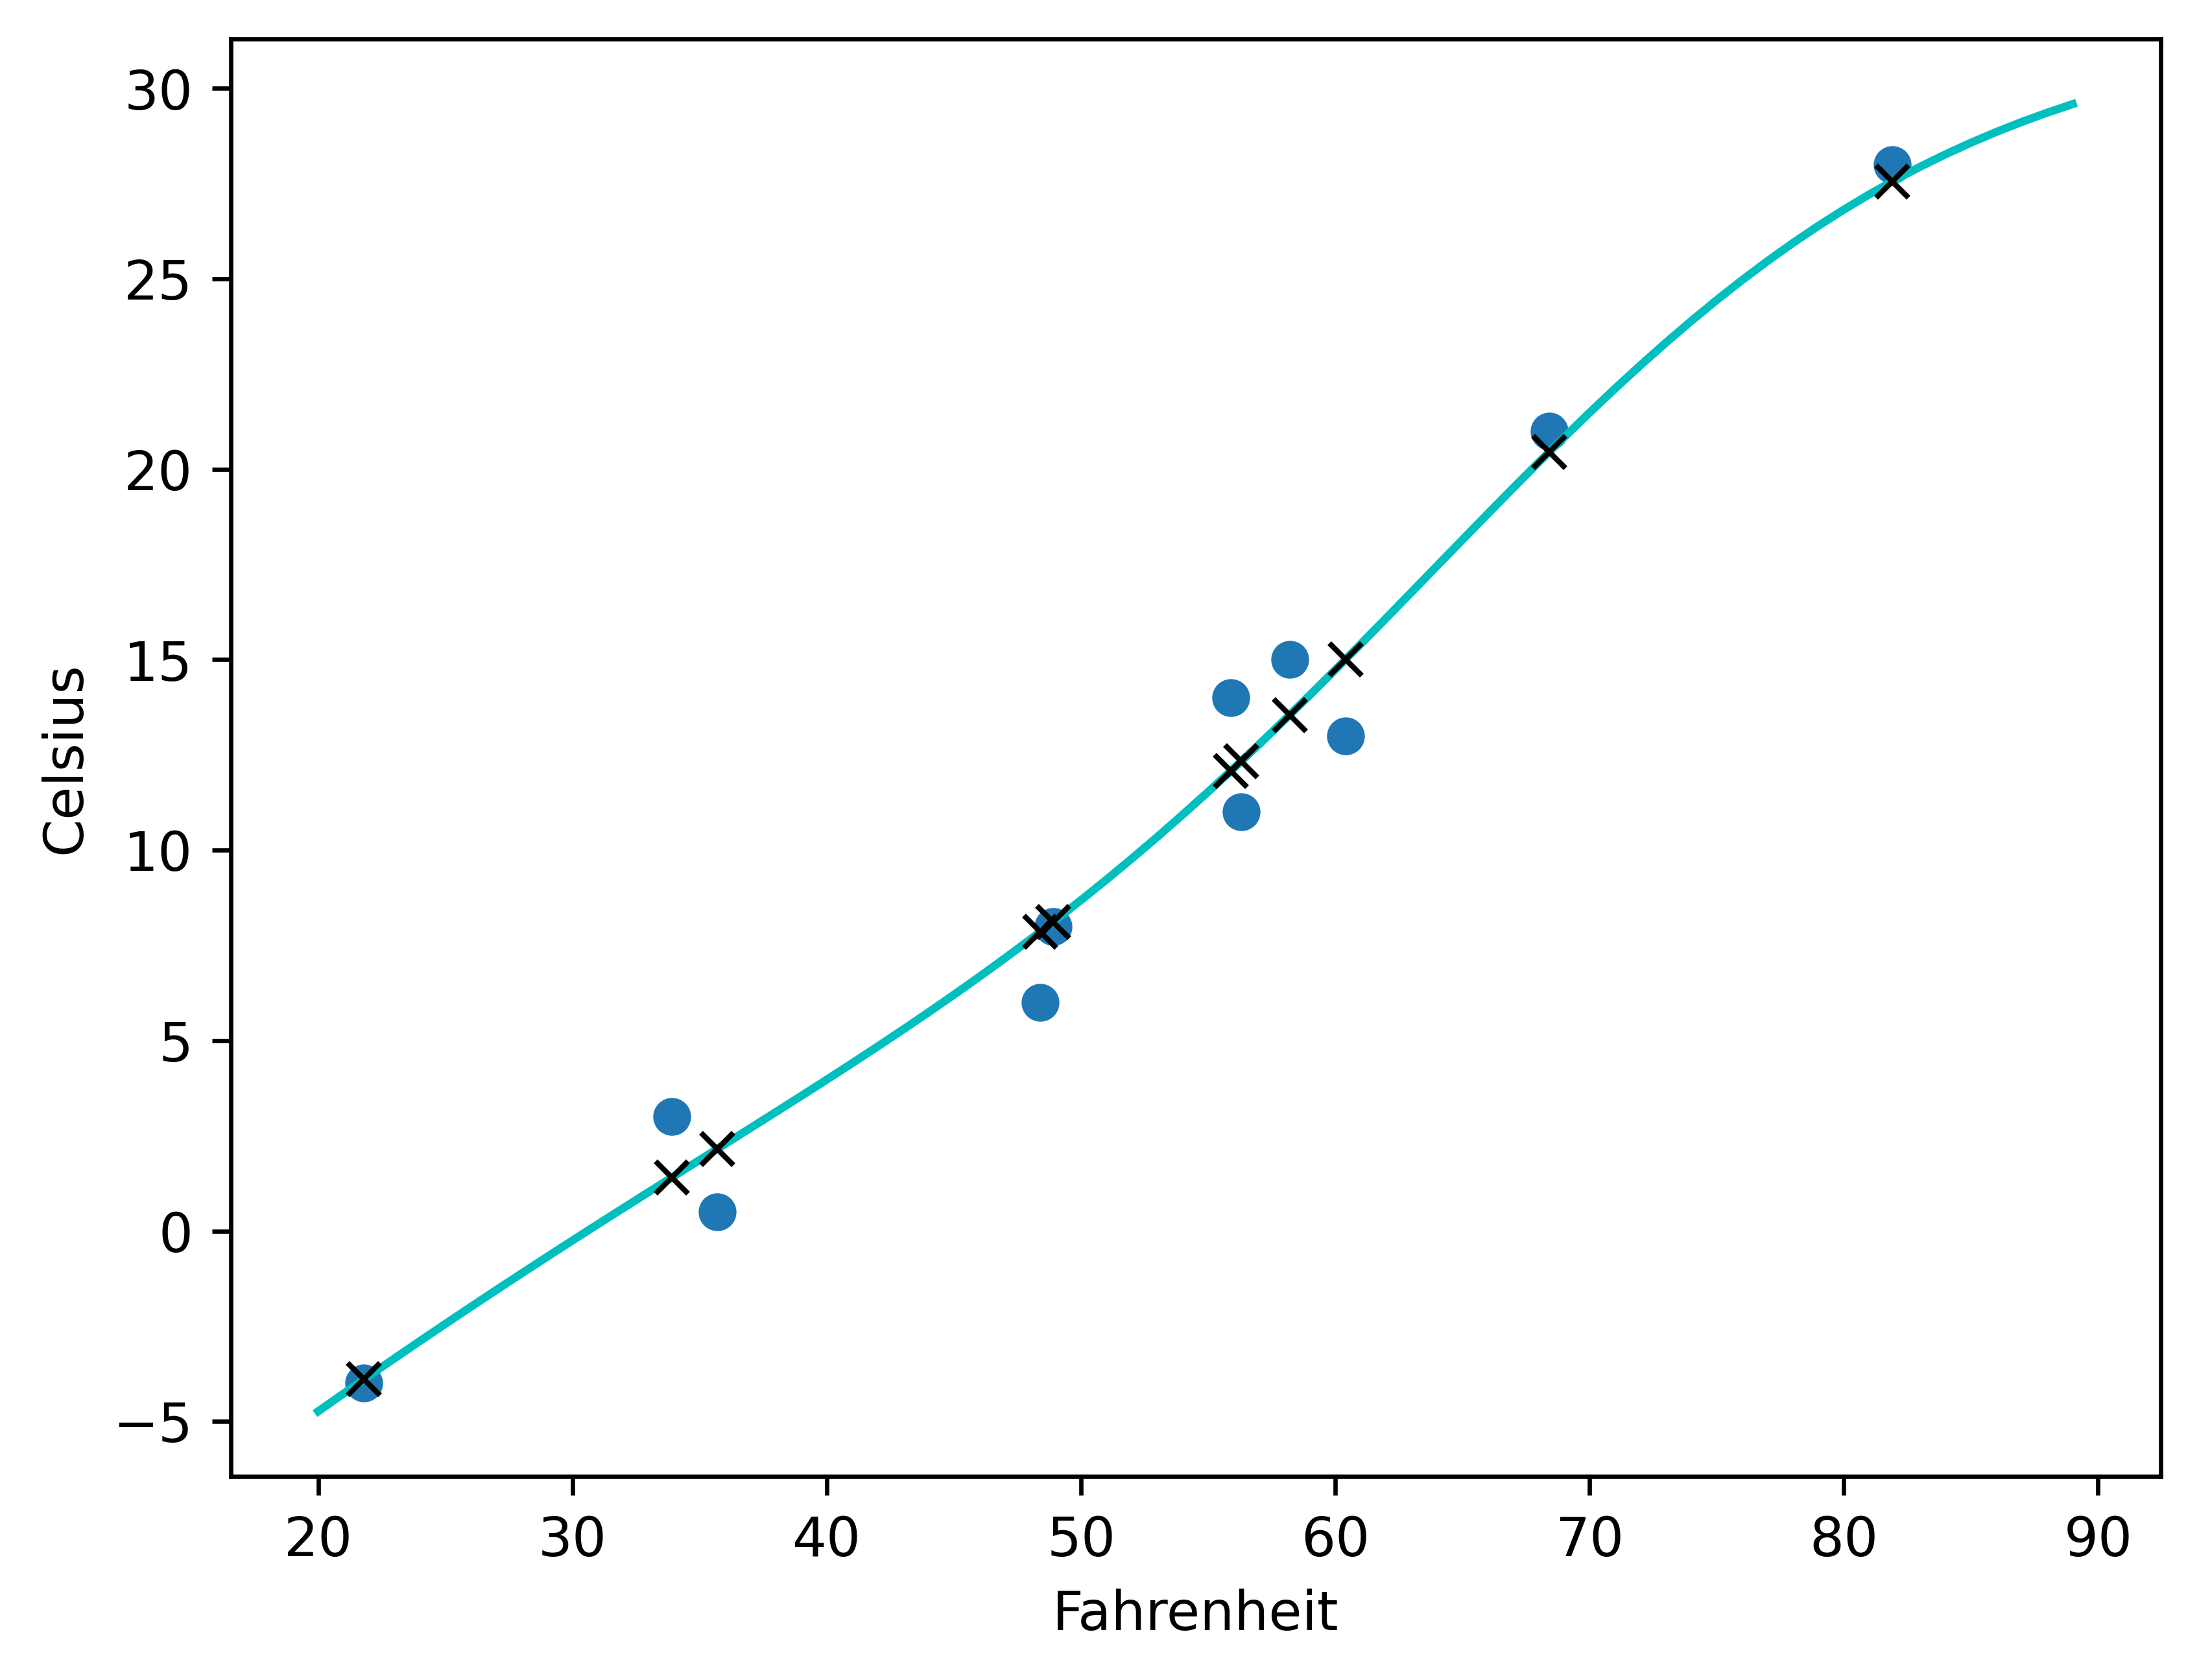

In [24]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 170.4354, Validation loss 230.9947
Epoch 1000, Training loss 52.5396, Validation loss 54.2510
Epoch 2000, Training loss 33.1354, Validation loss 36.9359
Epoch 3000, Training loss 18.4813, Validation loss 23.9048
Epoch 4000, Training loss 10.9713, Validation loss 15.6212
Epoch 5000, Training loss 7.6651, Validation loss 11.1393


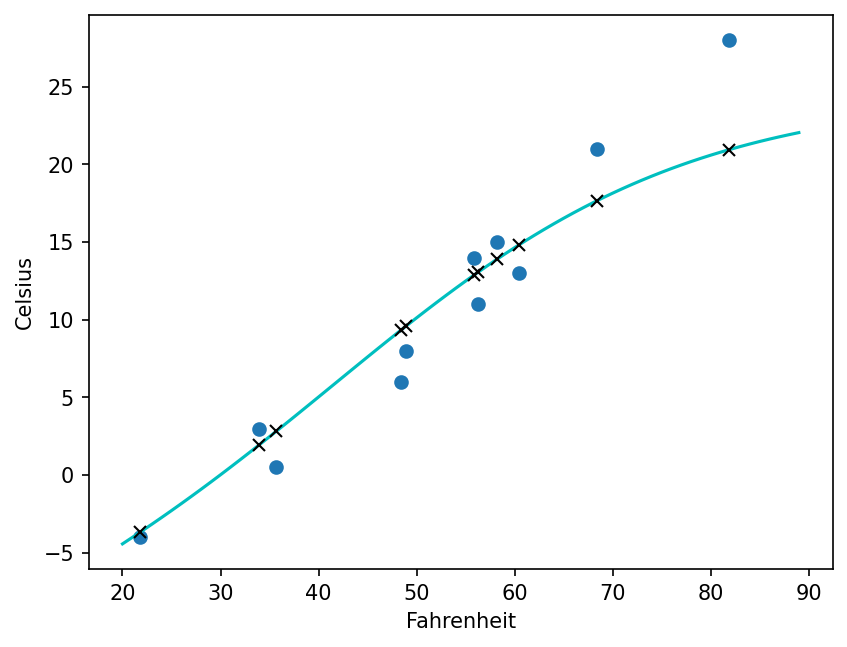

In [25]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
